# Part-1

In [102]:
import pandas as pd
import numpy as np

#### Saving data to DataFrame

In [103]:
df0=pd.read_csv("states0.csv")
df1=pd.read_csv("states1.csv")
df2=pd.read_csv("states2.csv")
df3=pd.read_csv("states3.csv")
df4=pd.read_csv("states4.csv")
df5=pd.read_csv("states5.csv")
df6=pd.read_csv("states6.csv")
df7=pd.read_csv("states7.csv")
df8=pd.read_csv("states8.csv")
df9=pd.read_csv("states9.csv")
us_census=pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9])
#display(us_census)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


#### Ispecting Data

In [104]:
display(us_census.columns)
display(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

#### Cleaning Data

In [105]:
us_census["Income"] = us_census['Income'].replace({'\$': ''}, regex=True).astype(float)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F


In [106]:
us_census["Men"]=(us_census["GenderPop"].str.split(pat='_',expand=True))[0]
us_census["Women"]=(us_census["GenderPop"].str.split(pat='_',expand=True))[1]
us_census["Men"]=us_census["Men"].replace({"M":""},regex=True).astype(int)
us_census["Women"]=us_census["Women"].replace({"F":""},regex=True)
us_census["Women"]=us_census["Women"].replace(r'^\s*$', np.nan, regex=True)
us_census["Women"]=us_census["Women"].fillna((us_census["TotalPop"].astype(int))-(us_census["Men"]))
us_census["Women"]=us_census["Women"].astype(int)
us_census=us_census.drop_duplicates()

#### Scatter Plot

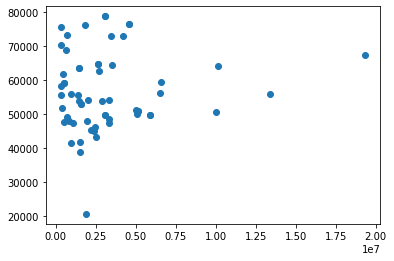

In [107]:
import matplotlib.pyplot as plt
plt.scatter(us_census["Women"],us_census["Income"])
plt.show()

In [108]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329


#### cleaning data for Histogram

In [109]:
us_census["White"]=us_census["White"].replace({"%":""},regex=True).astype(float)

In [110]:
us_census["Hispanic"]=us_census["Hispanic"].replace({"%":""},regex=True).astype(float)

In [111]:
us_census["Black"]=us_census["Black"].replace({"%":""},regex=True).astype(float)

In [112]:
us_census["Native"]=us_census["Native"].replace({"%":""},regex=True).astype(float)

In [113]:
us_census["Asian"]=us_census["Asian"].replace({"%":""},regex=True).astype(float)

In [114]:
us_census["Pacific"]=us_census["Pacific"].replace({"%":""},regex=True).astype(float)


In [115]:
us_census=us_census.drop_duplicates()

(array([ 1.,  0.,  1.,  1.,  3., 10.,  9., 11., 15.,  9.]),
 array([ 0.77361894, 10.09456306, 19.41550717, 28.73645129, 38.05739541,
        47.37833952, 56.69928364, 66.02022776, 75.34117188, 84.66211599,
        93.98306011]),
 <a list of 10 Patch objects>)

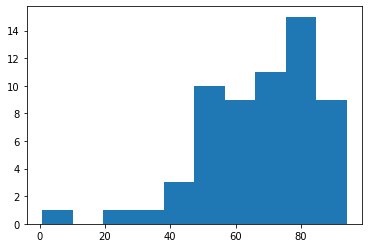

In [116]:
plt.hist(us_census["White"])

(array([22., 11.,  8.,  9.,  1.,  3.,  3.,  1.,  1.,  1.]),
 array([ 0.09255919,  5.2609569 , 10.42935461, 15.59775233, 20.76615004,
        25.93454775, 31.10294546, 36.27134318, 41.43974089, 46.6081386 ,
        51.77653631]),
 <a list of 10 Patch objects>)

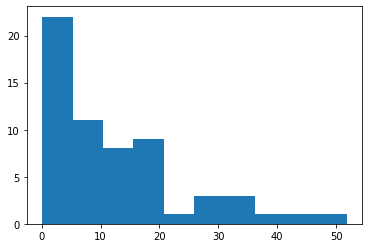

In [117]:
plt.hist(us_census["Black"])

(array([37., 16.,  3.,  2.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.29090909, 11.05117557, 20.81144204, 30.57170852, 40.33197499,
        50.09224147, 59.85250794, 69.61277442, 79.37304089, 89.13330737,
        98.89357384]),
 <a list of 10 Patch objects>)

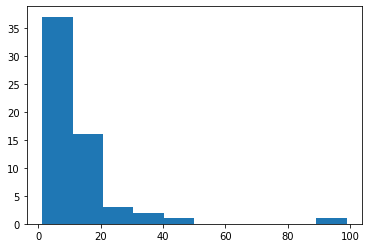

In [118]:
plt.hist(us_census["Hispanic"])

(array([53.,  0.,  1.,  1.,  2.,  2.,  0.,  0.,  0.,  1.]),
 array([2.81848929e-03, 1.64163844e+00, 3.28045838e+00, 4.91927833e+00,
        6.55809828e+00, 8.19691823e+00, 9.83573817e+00, 1.14745581e+01,
        1.31133781e+01, 1.47521980e+01, 1.63910180e+01]),
 <a list of 10 Patch objects>)

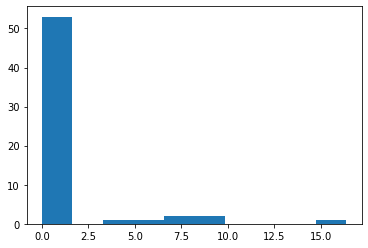

In [119]:
plt.hist(us_census["Native"])

(array([45., 10.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.07519729,  3.72688643,  7.37857556, 11.03026469, 14.68195382,
        18.33364295, 21.98533208, 25.63702121, 29.28871034, 32.94039948,
        36.59208861]),
 <a list of 10 Patch objects>)

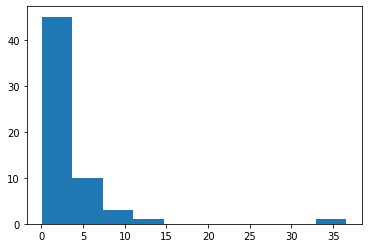

In [120]:
plt.hist(us_census["Asian"])

C:\Users\Syed\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Syed\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([53.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.24013529e-03, 8.77002198e-01, 1.75276426e+00, 2.62852632e+00,
        3.50428838e+00, 4.38005045e+00, 5.25581251e+00, 6.13157457e+00,
        7.00733663e+00, 7.88309870e+00, 8.75886076e+00]),
 <a list of 10 Patch objects>)

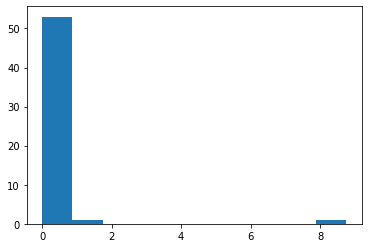

In [121]:
plt.hist(us_census["Pacific"])

# Part-2

In [130]:
inventory=pd.read_csv("inventory.csv")
staten_island=inventory[0:10]
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [131]:
product_request=staten_island["product_description"]
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

In [132]:
seed_request=inventory[(inventory["location"]=="Brooklyn") & (inventory["product_type"]=="seeds")]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


In [136]:
inventory["quantity"]=inventory["quantity"].astype(int)
inventory["in_stock"]=True
for i in inventory.index:
    if inventory["quantity"].iloc[i]==0:
        inventory["in_stock"].iloc[i]=False
inventory       

C:\Users\Syed\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False
5,Staten Island,garden tools,spade,93,19.99,True
6,Staten Island,pest_control,insect killer,74,12.99,True
7,Staten Island,pest_control,weed killer,8,23.99,True
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False
9,Staten Island,planter,8 inch plastic planter,53,3.99,True


In [126]:
inventory["total_value"]=inventory["price"]*inventory["quantity"]
#inventory

In [127]:
#combine_lambda = lambda row: \
 #   '{} - {}'.format(row.product_type,
  #                   row.product_description)

In [128]:
combine_lambda = lambda row: row.product_type+"_"+row.product_description


In [129]:
inventory["full_description"]=combine_lambda(inventory)